In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
 

In [100]:
data = fetch_california_housing()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [101]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [102]:
data.feature_names, data.target_names

(['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 ['MedHouseVal'])

In [103]:
X = data.data[:, [0]]
y = data.target

In [104]:
X.shape, y.shape

((20640, 1), (20640,))

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.2, random_state=42)

## Apply scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [106]:
X_train, X_test

(array([[-0.96331319],
        [-0.73060234],
        [-0.80991421],
        ...,
        [-0.48963637],
        [ 0.96535505],
        [-0.67715304]]),
 array([[-1.14440341],
        [-0.70024648],
        [-0.20452117],
        ...,
        [ 0.30384807],
        [ 0.06711416],
        [ 0.13848439]]))

In [107]:
model = LinearRegression()
model.fit(X_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [108]:
y_pred = model.predict(X_test)
y_pred

array([1.16705471, 1.51821898, 1.91015482, ..., 2.31208734, 2.12491815,
       2.18134567])

In [109]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

mse, r2, rmse

(0.6963084872470856, 0.4756466967760341, 0.8344510094949167)

In [110]:
print(f"Coefficient (Slope): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Coefficient (Slope): 0.7906
Intercept: 2.0719
Mean Squared Error: 0.6963
R² Score: 0.4756


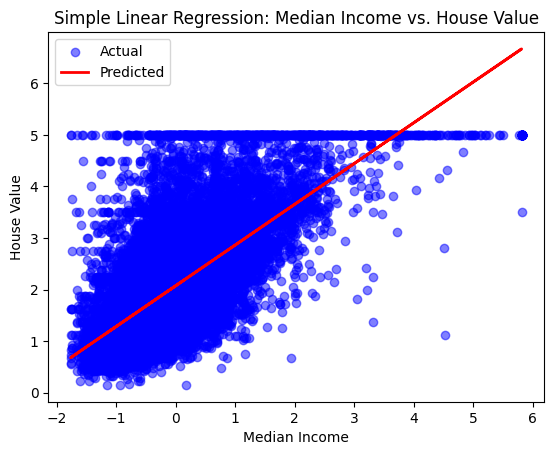

In [111]:
# 6. Visualization
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label="Actual")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Predicted")
plt.xlabel("Median Income")
plt.ylabel("House Value")
plt.title("Simple Linear Regression: Median Income vs. House Value")
plt.legend()
plt.show()

## Same code in single block

[Pipeline] Coefficient (Slope): 0.7906
[Pipeline] Intercept: 2.0719
[Pipeline] Mean Squared Error: 0.6963
[Pipeline] RMSE: 0.8345
[Pipeline] R² Score: 0.4756


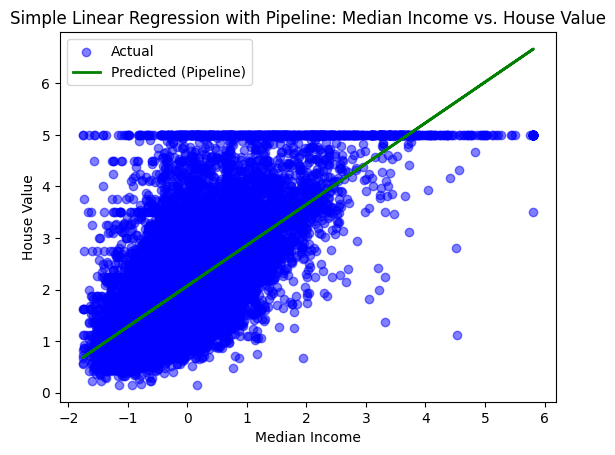

In [112]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create pipeline with scaling and linear regression
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", LinearRegression())
])

# Fit pipeline
pipeline.fit(X_train, y_train)

# Predict
y_pred_pipe = pipeline.predict(X_test)

# Evaluate
mse_pipe = mean_squared_error(y_test, y_pred_pipe)
r2_pipe = r2_score(y_test, y_pred_pipe)
rmse_pipe = np.sqrt(mse_pipe)

print(f"[Pipeline] Coefficient (Slope): {pipeline.named_steps['regressor'].coef_[0]:.4f}")
print(f"[Pipeline] Intercept: {pipeline.named_steps['regressor'].intercept_:.4f}")
print(f"[Pipeline] Mean Squared Error: {mse_pipe:.4f}")
print(f"[Pipeline] RMSE: {rmse_pipe:.4f}")
print(f"[Pipeline] R² Score: {r2_pipe:.4f}")

# Visualization
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label="Actual")
plt.plot(X_test, y_pred_pipe, color='green', linewidth=2, label="Predicted (Pipeline)")
plt.xlabel("Median Income")
plt.ylabel("House Value")
plt.title("Simple Linear Regression with Pipeline: Median Income vs. House Value")
plt.legend()
plt.show()